<H1>INTRODUCTION</H1>
Interconnect, a prominent telecom operator, is dedicated to enhancing customer satisfaction and retention. To achieve this goal, they seek to predict client churn proactively, allowing timely interventions and tailored solutions to retain valued customers. First, we will analyze a comprehensive dataset encompassing clients' plans, contracts, and other essential attributes. Then we will employ advanced machine learning techniques to build a predictive model. ROC-AUC will be the metric we use to gauge the effectiveness of our model. This model will empower Interconnect to forecast churn patterns, enabling them to implement personalized strategies and promotional offers to retain their clientele effectively. 

In [2]:
#import neccessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

KeyboardInterrupt: 

In [6]:
#download data as dataframes
import pandas as pd

contract = pd.read_csv('contract.csv')
client_data = pd.read_csv('personal.csv')
internet = pd.read_csv('internet.csv')
phone = pd.read_csv('phone.csv')

<h1>A) Exploratory Data Analysis and Feature Engineering</h1>

<h2>Contract</h2>

In [29]:
print(contract.info())
print(contract.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-

<p style="color:blue">1) Seems there isn't any missing data. However, there are columns in which its data type must be converted (BeginDate and TotalCharges)<br>
2) Create a new column called churn based off the data in EndDate.<br>
3) Create a new column to see how long someone has been a member since 2020-02-01 (in days)</p>

In [30]:
# Convert the 'BeginDate' column to datetime
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

# Convert the 'TotalCharges' column to float
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')


In [31]:
# Create the 'churn' column based on the 'EndDate' values
# 0 represents client has not churned and 1 represents client has disconnected service
contract['churn'] = contract['EndDate'].apply(lambda x: 0 if x == "No" else 1)


In [32]:
# the specific date
specific_date = pd.to_datetime('2020-02-01')

#Calculate the number of days as a member and place it in a new column
contract['days_as_a_member'] = (specific_date - contract['BeginDate']).dt.days

# Now the 'days_as_a_member' column contains the number of days from each record to '2020-02-01'.

In [33]:
print(contract.info())
print(contract)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7043 non-null   int64         
 9   days_as_a_member  7043 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 550.4+ KB
None
      customerID  BeginDate              EndDate            Type  \
0     7590-VHVEG 2020-01-01                   No  Month-to-month   
1     5575-GNVDE 2017

<p style="color:red">There were were non-numerical values in TotalCharges. We will drop those rows later.</p>

In [34]:
# Replace NaN values with 0
contract['TotalCharges'].fillna(0, inplace=True)

#Drop BeginDate
merged_data_final = merged_data_final.drop(['BeginDate'], axis=1)

<h2>Personal (client_data)</h2>

In [35]:
print(client_data.info())
print(client_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


<p style="color:blue">All this personal information doesn't seem relelvant or as important as other information. More data does not always equal better results; it can hurt our model. Hence, we will not work this data.</p>

<h2>Internet</h2>

In [36]:
print(internet.info())
print(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes 

<p style="color:blue">Only information relevant is that the customer HAS AN INTERNET PLAN IN THE FIRST PLACE. The additional services chosen aren't relevant. This would be reflected in the total monthly price regardless. As more add-ons would result in a higher monthly price.</p>

In [37]:
# Drop all columns except the first one
internet = internet.iloc[:, [0]]

# Add a new column named "has_internet" with a value of 1 for every row
internet['has_internet'] = 1

print(internet)

      customerID  has_internet
0     7590-VHVEG             1
1     5575-GNVDE             1
2     3668-QPYBK             1
3     7795-CFOCW             1
4     9237-HQITU             1
...          ...           ...
5512  6840-RESVB             1
5513  2234-XADUH             1
5514  4801-JZAZL             1
5515  8361-LTMKD             1
5516  3186-AJIEK             1

[5517 rows x 2 columns]


<h2>Phone</h2>

In [38]:
print(phone.info())
print(phone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


<p style="color:blue">Only information relevant is that the customer HAS AN PHONE PLAN IN THE FIRST  PLACE. The additional services chosen aren't relevant. This would be reflected in the total monthly price regardless. As more add-ons would result in a higher monthly price.</p>

In [39]:
# Drop all columns except the first one
phone = phone.iloc[:, [0]]

# Add a new column named "has_phone" with a value of 1 for every row
phone['has_phone'] = 1

print(phone)

      customerID  has_phone
0     5575-GNVDE          1
1     3668-QPYBK          1
2     9237-HQITU          1
3     9305-CDSKC          1
4     1452-KIOVK          1
...          ...        ...
6356  2569-WGERO          1
6357  6840-RESVB          1
6358  2234-XADUH          1
6359  8361-LTMKD          1
6360  3186-AJIEK          1

[6361 rows x 2 columns]


<H2>Merge</H2>

In [40]:
# Perform a left join on 'customerID' with contract dataframe and internet and phone
merged_data = contract.merge(internet, on='customerID', how='left')
merged_data_final = merged_data.merge(phone, on='customerID', how='left')

# Fill missing values with 0
merged_data_final.fillna(0, inplace=True)

#drop unnecessary columns. this columns shouldn't have any significance as these are customer choices. We don't need BeginDate or EndDate anymore.
merged_data_final = merged_data_final.drop(['customerID','PaperlessBilling', 'PaymentMethod','EndDate','BeginDate'], axis=1)

#drop where we have missing values for TotalCharges
merged_data_final = merged_data_final[merged_data_final['TotalCharges'] != 0]

print(merged_data_final.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   MonthlyCharges    7032 non-null   float64
 2   TotalCharges      7032 non-null   float64
 3   churn             7032 non-null   int64  
 4   days_as_a_member  7032 non-null   int64  
 5   has_internet      7032 non-null   float64
 6   has_phone         7032 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 439.5+ KB
None


<h1>B) Exploratory Data Analysis Part 2</h1><br>
<b>Statistics, Data Distribution, and Data Visualization</b>

In [41]:
#statistics
print(merged_data_final.describe())

# Calculate the total number of rows in our DataFrame
total_customers = len(merged_data_final)

#calculate our many people have an internet plan and phone plan respectively
has_internet_count = merged_data_final['has_internet'].sum()
has_phone_count = merged_data_final['has_phone'].sum()

# Divide the sums by the total number of people to get the percentage
has_internet_percent = has_internet_count / total_customers
has_phone_percent = has_phone_count / total_customers

print()
print("Percentage with Internet Plan:", has_internet_percent)
print("Percentage with Phone Plan:", has_phone_percent)


       MonthlyCharges  TotalCharges        churn  days_as_a_member  \
count     7032.000000   7032.000000  7032.000000       7032.000000   
mean        64.798208   2283.300441     0.265785       1008.031428   
std         30.085974   2266.771362     0.441782        736.095040   
min         18.250000     18.800000     0.000000         31.000000   
25%         35.587500    401.450000     0.000000        306.000000   
50%         70.350000   1397.475000     0.000000        883.000000   
75%         89.862500   3794.737500     1.000000       1706.000000   
max        118.750000   8684.800000     1.000000       2314.000000   

       has_internet    has_phone  
count   7032.000000  7032.000000  
mean       0.783845     0.903299  
std        0.411650     0.295571  
min        0.000000     0.000000  
25%        1.000000     1.000000  
50%        1.000000     1.000000  
75%        1.000000     1.000000  
max        1.000000     1.000000  

Percentage with Internet Plan: 0.7838452787258248
Per

In [42]:
# Select rows where the value in the column 'churn' equals 0
df_nonchurn = merged_data_final[merged_data_final['churn'] == 0].copy()

# Calculate the total number of rows in our new nonchurn dataFrame
total_customers_nonchurn = len(df_nonchurn)

#calculate our many people whom have chruned and have an internet plan and phone plan respectively
has_internet_nonchurn_count = df_nonchurn['has_internet'].sum()
has_phone_nonchurn_count = df_nonchurn['has_phone'].sum()

# Divide the sums by the total number of people to get the percentage
has_internet_nonchurn_percent = has_internet_nonchurn_count / total_customers_nonchurn
has_phone_nonchurn_percent = has_phone_nonchurn_count / total_customers_nonchurn

print()
print("Percentage with Internet Plan:", has_internet_nonchurn_percent)
print("Percentage with Phone Plan:", has_phone_nonchurn_percent)
print()

#statistics
print(df_nonchurn.describe())


Percentage with Internet Plan: 0.7274840209180709
Percentage with Phone Plan: 0.9012202208018594

       MonthlyCharges  TotalCharges   churn  days_as_a_member  has_internet  \
count     5163.000000   5163.000000  5163.0       5163.000000   5163.000000   
mean        61.307408   2555.344141     0.0       1146.885532      0.727484   
std         31.094557   2329.456984     0.0        732.773458      0.445297   
min         18.250000     18.800000     0.0         31.000000      0.000000   
25%         25.100000    577.825000     0.0        457.000000      0.000000   
50%         64.450000   1683.600000     0.0       1157.000000      1.000000   
75%         88.475000   4264.125000     0.0       1857.000000      1.000000   
max        118.750000   8672.450000     0.0       2191.000000      1.000000   

         has_phone  
count  5163.000000  
mean      0.901220  
std       0.298395  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


In [43]:
# Select rows where the value in the column 'churn' equals 1
df_churn = merged_data_final[merged_data_final['churn'] == 1].copy()

# Calculate the total number of rows in our new chrun dataFrame
total_customers_churn = len(df_churn)

#calculate our many people whom have chruned and have an internet plan and phone plan respectively
has_internet_churn_count = df_churn['has_internet'].sum()
has_phone_churn_count = df_churn['has_phone'].sum()

# Divide the sums by the total number of people to get the percentage
has_internet_churn_percent = has_internet_churn_count / total_customers_churn
has_phone_churn_percent = has_phone_churn_count / total_customers_churn

print()
print("Percentage with Internet Plan:", has_internet_churn_percent)
print("Percentage with Phone Plan:", has_phone_churn_percent)
print()

#statistics
print(df_churn.describe())


Percentage with Internet Plan: 0.9395398608881755
Percentage with Phone Plan: 0.9090422685928304

       MonthlyCharges  TotalCharges   churn  days_as_a_member  has_internet  \
count     1869.000000   1869.000000  1869.0       1869.000000   1869.000000   
mean        74.441332   1531.796094     1.0        624.455324      0.939540   
std         24.666053   1890.822994     0.0        595.910567      0.238401   
min         18.850000     18.850000     1.0         62.000000      0.000000   
25%         56.150000    134.500000     1.0        153.000000      1.000000   
50%         79.650000    703.550000     1.0        365.000000      1.000000   
75%         94.200000   2331.300000     1.0        945.000000      1.000000   
max        118.350000   8684.800000     1.0       2314.000000      1.000000   

         has_phone  
count  1869.000000  
mean      0.909042  
std       0.287626  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


<p style="color:blue">Comparing the statistics between the customers who have not churned (or are loyal) and those who have churned yield very informative information.<br>
1) Almost 94% of customers who churned has an internet plan, whereas only 73% of non-churn customers had an internent plan. This shows customers might be leaving because they believe they are paying too much for an internent plan and add-ons.<br>
2) The 25% Percentile for Churn Monthly charges are more than double than Non-Churn. The mean is also higher. So once again price is a big factor.<br>
3) The length of time as a member is a huge factor. It's clear the longer one has been a customer the least likely they are to leave. ALSO, there is something VERY interesting here. The 50% percentile for churned cusotmers is exactly 365 days or 1 year!!! That can't be a coincendence. I wouldn't be surprised if new customers are given a 1 year promotional deal, and then leave when it's over!</p>

<p style="color:blue">Now let's look at visualizations to see how the data is distrubited.</p>

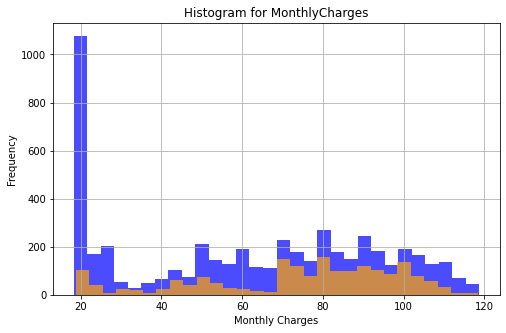

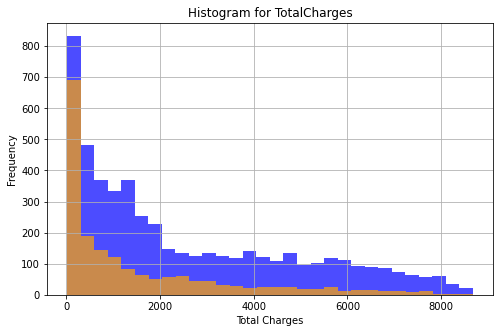

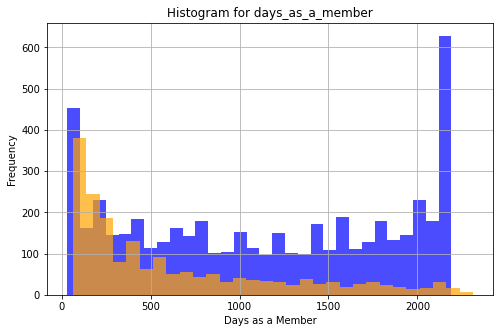

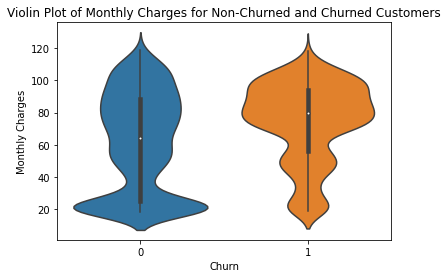

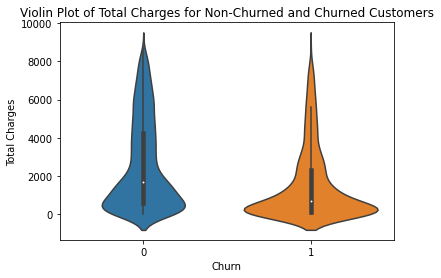

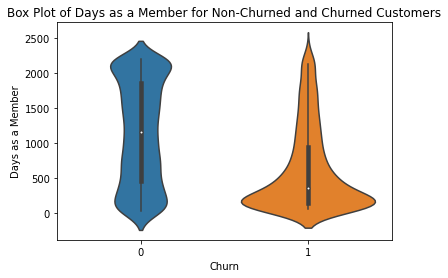

In [45]:
#Histogram for 'MonthlyCharges'
plt.figure(figsize=(8, 5))
plt.hist(df_nonchurn['MonthlyCharges'], bins=30, alpha=0.7, color='blue')
plt.hist(df_churn['MonthlyCharges'], bins=30, alpha=0.7, color='orange')
plt.title('Histogram for MonthlyCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Histogram for 'TotalCharges'
plt.figure(figsize=(8, 5))
plt.hist(df_nonchurn['TotalCharges'], bins=30, alpha=0.7, color='blue')
plt.hist(df_churn['TotalCharges'], bins=30, alpha=0.7, color='orange')
plt.title('Histogram for TotalCharges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Histogram for 'days_as_a_member'
plt.figure(figsize=(8, 5))
plt.hist(df_nonchurn['days_as_a_member'], bins=30, alpha=0.7, color='blue')
plt.hist(df_churn['days_as_a_member'], bins=30, alpha=0.7, color='orange')
plt.title('Histogram for days_as_a_member')
plt.xlabel('Days as a Member')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sns.violinplot(x='churn', y='MonthlyCharges', data=merged_data_final)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Violin Plot of Monthly Charges for Non-Churned and Churned Customers')
plt.show()

sns.violinplot(x='churn', y='TotalCharges', data=merged_data_final)
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Violin Plot of Total Charges for Non-Churned and Churned Customers')
plt.show()

sns.violinplot(x='churn', y='days_as_a_member', data=merged_data_final)
plt.xlabel('Churn')
plt.ylabel('Days as a Member')
plt.title('Box Plot of Days as a Member for Non-Churned and Churned Customers')
plt.show()

<p style="color:blue">It seems my previous observsations are suppported.<br>
1) Customers who stay have lower montly costs. Based on the violin chart for Monthy Charges, most of the churned customers are paying higher monthhly costs.<br>
2) The histogram and violin chart for days as a member clearly show that the vast majority of churned customers weren't members for relatively long.</p>

<h1>C) Model</h1>

<b>Data Transformation</b>

In [384]:
# Perform One-Hot-Encoding on the 'Type' column
merged_data_final = pd.get_dummies(merged_data_final, columns=['Type'], drop_first=True)

print(merged_data_final.head())


   MonthlyCharges  TotalCharges  churn  has_internet  has_phone  \
0           29.85         29.85      0           1.0        0.0   
1           56.95       1889.50      0           1.0        1.0   
2           53.85        108.15      1           1.0        1.0   
3           42.30       1840.75      0           1.0        0.0   
4           70.70        151.65      1           1.0        1.0   

   days_as_a_member  Type_One year  Type_Two year  
0                31              0              0  
1              1036              1              0  
2               123              0              0  
3              1371              1              0  
4               153              0              0  


<b>Model 1 - Logistic Regression</b>

In [385]:
# Step 1: Split data into features (X) and target (y) dataframes
X = merged_data_final.drop(columns=['churn'])
y = merged_data_final['churn']

# Step 2: Split data into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=123)

# Step 3: Create and train a Logistic Regression model
logreg_model = LogisticRegression(random_state=123)
logreg_model.fit(X_train, y_train)

# Step 4: Predict the probabilities of the target variable using the validation set
y_pred_prob = logreg_model.predict_proba(X_val)[:, 1]  # Probability of positive class (churn = 1)

# Step 5: Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(y_val, y_pred_prob)

print("AUC-ROC Score:", auc_roc_score)


AUC-ROC Score: 0.8371413636532347


<b>Model 2 - Gradient Boosting</b>

In [386]:
# Assuming 'merged_data_final' contains the merged data with features and target
features = merged_data_final.drop('churn', axis=1)
target = merged_data_final['churn']

# Split the data into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=123)

# Create and train the Gradient Boosting model
boost_model = GradientBoostingClassifier(random_state=123)
boost_model.fit(X_train, y_train)

# Predict the probabilities of the target variable using the validation set
y_val_pred_prob = boost_model.predict_proba(X_val)[:, 1]

# Calculate the AUC-ROC score for the Gradient Boosting model
auc_roc_score = roc_auc_score(y_val, y_val_pred_prob)

print("AUC-ROC Score:", auc_roc_score)


AUC-ROC Score: 0.9158650574684202


<H1>CONCLUSION</H1>

Gradiant Boosting yielded fantastic accuracy! Interconnect should feel comfortable using this model with the features I have chosen. This model should be used on current customers to see who is likely to churn and provide those customers with a promotional deal. I strongly believe that the median length as customer, for those whom churned, should not be ignored! As mentioned, it can't be a coincidence. Perhaps their initial one year contract or promotion ended. A simple 2nd promotion should help, especially those with an internent plan.